### Projekt Oggave 5-8 med Breast Cancer Datasæt: Klassifikation med Logistisk Regression + Metrics
5. Træn en `LogisticRegression`-model (brug alle data-rækker) til at klassificere tumorer som benigne eller maligne. Eksperimenter med forskellige værdier af parametrene `max_iter`, `test_size` og `random_state`.

6. Evaluer modellen ved hjælp af `accuracy_score`. Forsøg at finde værdier for parametrene som mindsker din accuracy.

7. Brug `confusion_matrix` til at analysere fejlkategorier. Se hvordan din confusion matrix ændres, når du ændrer på parametrenes værdier (og dermed accuracy).

8. Visualiser resultatet med `seaborn.heatmap()`.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

### Databehandling

In [3]:
breast_cancer = load_breast_cancer()

df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])
df['target'] = breast_cancer['target']
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Feature og Output (Target) fordeling

I dette tilfælde prøver jeg at forudsige: 'mean radius'. Så derfor fjerner jeg den fra X, (Features).

In [4]:
X = df.drop('target', axis=1)
y = df['target']



### Splittelse i Trænings -og Testdatasæt
I følgende vil jeg splitte X og y til trænings og testdata.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5, random_state=42)

print(f'Ud af {len(X)} datapunkter, bruges {len(X_train)} til træning og {len(X_test)} til test')
print(f"Antallet af Træningsdatapunkter: {len(X_train)}")
print(f"Antallet af Testdatapunkter: {len(X_test)}")

Ud af 569 datapunkter, bruges 284 til træning og 285 til test
Antallet af Træningsdatapunkter: 284
Antallet af Testdatapunkter: 285


### Udførelse af Logistisk Regression

#### Eksperimenter:
- Prøve forskellige Hyperparameters af.
    - n_jobs: Mængden af CPU kerner, som bruges til at udføre komputationen. (-1 bruger alle)

In [6]:
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Testdatasæt - Sammenligning a reelle data med forudsagte data.

In [7]:
y_pred = model.predict(X_test)

y_comparison = pd.DataFrame({
    'Predicted Value': y_pred,
    'Actual Value': y_test,

})

y_comparison.sample(frac=1)

,Predicted Value,Actual Value
531,1,1
411,1,1
67,1,1
381,1,1
244,0,0
...,...,...
148,1,1
355,1,1
57,0,0
468,0,0


### Metrics - Estimators 'Score' Metode
Dette er klart den hurtigste og nemmest tilgængelige metode for Metrics.
Denne metode bruges til at beregne scoren for den givne model. Resultatet af den afhænger dog af hvilken model man bruger.

For Lineær Regression returnerer den altså R2-Værdien.

In [8]:
model.score(X_test, y_test)

0.9614035087719298

### Scikit-Learn Metrics: Accuracy, F1-Score, Recall, Precision

Man kan selv teste for de enkelte Metrics på følgende måde:

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#Manuelt:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

Accuracy: 0.9614035087719298
F1-Score: 0.9701897018970189
Precision: 0.9835164835164835
Recall: 0.9572192513368984


### Classification Report

Men man kan også gøre brug af noget, der hedder Classification Report, som viser de fleste relevante metrics for en klassifikationsmodel.

In [10]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.922330,0.983516,0.961404,0.952923,0.962477
recall,0.969388,0.957219,0.961404,0.963304,0.961404
f1-score,0.945274,0.970190,0.961404,0.957732,0.961622
support,98.000000,187.000000,0.961404,285.000000,285.000000


### Confusion Matrix


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 95,   3],
       [  8, 179]])

In [12]:
print(f"Actual 0: {len(y_test[y_test == 0])}")
print(f"Predicted 0: {len(y_pred[y_pred == 0])}")
print(f"Predicted 1: {len(y_pred[y_pred == 1])}")
print(f"Actual 1: {len(y_test[y_test == 1])}")

Actual 0: 98
Predicted 0: 103
Predicted 1: 182
Actual 1: 187


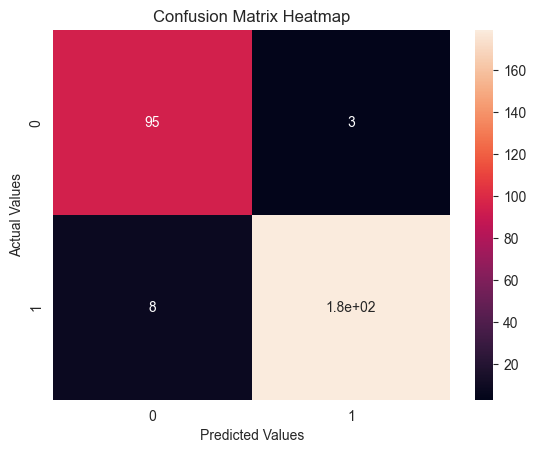

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.title('Confusion Matrix Heatmap')
plt.show()